In [49]:
import matplotlib.pyplot as plt
from IPython.display import display, Math
# if using a jupyter notebook: include %matplotlib inline. If constructing a .py-file: comment out
%matplotlib inline
# if high-resolution images are desired: include %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'svg'
import schemdraw
import schemdraw.elements as elm
import sympy as sp

# TP2

# Grupo 1
- Israel Pavelek
- Federico Santana
- Victoria 
- Nico1
- Nico2

## Ejercicio 1

El siguiente filtro pasabajos debe presentar una respuesta Butterworth con un ancho de banda de -3dB a 1KHz. Determinar el valor de L y C sabiendo que la carga es de 1 KΩ. Verificar las especificaciones del filtro mediante el uso de simuladores. Sugerencia: diseñar el filtro con valores normalizados en frecuencia e impedancia y luego desnormalizar para calcular el valor del filtro pedido

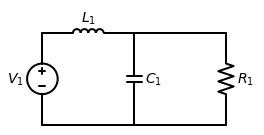

In [50]:

d = schemdraw.Drawing()
L1 = d.add(elm.Inductor().label('$L_1$'))
C1 = d.add(elm.Capacitor().down().label('$C_1$', loc='bottom'))
d += elm.Line().right()
R1 = d.add(elm.Resistor().up().label('$R_1$', loc='bottom'))
d.add(elm.Line().left())
line = d.add(elm.Line().left().at(C1.end))
V1 = d.add(elm.elm.SourceV().up().label('$V_1$',loc='top'))




d.draw()

Primero calcularemos la transferencia de este filtro, que es $$H(s)=\frac{z_1}{z_1+z_2}=\frac{\frac{z_c\cdot z_r}{z_c+z_r}}{z_l+\frac{z_c\cdot z_r}{z_c+z_r}}$$

In [123]:
# Definimos las variables y funciones
C,R,L = sp.symbols('C R L', positive=True)
s = sp.symbols('s')
H = sp.symbols('H', cls=sp.Function)

Z_c = 1/(s*C)
Z_l = s*L
Z_r = R

Z_2 = sp.simplify((Z_r * Z_c) / (Z_r + Z_c))

dem = sp.factor(Z_l + Z_2)

H = sp.factor(Z_2/(Z_l+Z_2))
display(Math("H(s)="+sp.latex(H)))

<IPython.core.display.Math object>

Lo queremos en su forma mónica, planeaba usar el comando $sympy.monic$ de $sympy.poly$

In [130]:
numerador, denominador = sp.fraction(H)
num = numerador / sp.poly(denominador,s).LC()
dem = sp.monic(sp.poly(denominador, s))
H = sp.Mul(num , 1/dem, evaluate=False)
display(Math("H(s)="+sp.latex(H)))


<IPython.core.display.Math object>

Nos interesa que sea un Butterworth de segundo orden, una transferencia de butterworth de segundo orden es:

$$H(s)=\frac{w_0}{s^2+\frac{w_0}{Q}s+w_0}$$

Normalizado a $$w_0 = 1$$

$$H(s)=\frac{1}{s^2+\sqrt{2}s+1}$$


De ahí deducimos que: 

$$\sqrt{2}=\frac{1}{CR} , L = \frac{1}{C}$$

R puede tener cualquier valor porque tengo un grado de libertad, decido $R=1\Omega$
$$C = \frac{1}{\sqrt{2}} \approx 0.707F$$
$$L = \frac{1}{C} \approx 1.414Hy$$

Simulación:

Captura de la simulación acá

## Ejercicio 2

Se desea diseñar un filtro pasabajos con las siguientes características.
- Máxima planicidad en la banda de paso
- Máxima atenuación: $0.02 dB$ para $0 < ⍵ < 1$
- Mínima atenuación para $⍵ > 2.2: 48 dB$
Se pide obtener los parámetros $n$ y $ɛ$


Sabemos que:

$$w_p = 1$$
$$w_s = 2.2$$
$$\alpha_{max}=0.02dB$$
$$\alpha_{min}=48dB$$

$$\epsilon = \sqrt{10^{-0.1\alpha_{max}} - 1}$$
$$\epsilon = \sqrt{10^{-0.1\cdot0.02dB} - 1}$$
$$\epsilon \approx 0.068$$

Además N:

$$N=\frac{log\left(\frac{10^{0.1\alpha_{min}}-1}{\epsilon^2}\right)}{2\cdot \log(w_s)}\approx 10.41 \Longrightarrow N=11$$

## Ejercicio 3
![](Ej3.png)

Aprovechando que todos tienen la misma $f_p$, normalizamos a esa frecuencia pero para poder trabajar cómodamente en $\omega$ lo hacemos por 2pi, es decir:

$$\Omega_w=2\pi \cdot f_p = 2\pi \cdot 1KHz$$

Calculamos \epsilon y N para cada caso

In [203]:
ripples = [0.5,0.5,1,0.5]
attenuation = [30,20,35,20]
w_s = [2.33,2.0,3.5,1.725]
cantidad = 4
decimales = 2
α_max = sp.symbols('α_{max}', positive=True)
α_min = sp.symbols('α_{min}', positive=True)
ws = sp.symbols('w_s', positive=True)
epsi = sp.symbols('e', positive=True);

epsilon = sp.sqrt(10**(0.1*α_max)-1)

num = sp.log( (10**(0.1*α_min)-1) / epsi**2, 10)
N = sp.log( num / 2 * sp.log(ws,10), 10)

display(Math(sp.latex(num)))

epsilons = []
Ns = []
for i in range(cantidad):
    epsilons.append(sp.N(epsilon.subs({α_max:ripples[i]}),decimales))
    Ns.append( sp.N(N.subs({epsi:epsilons[i], α_min:attenuation[i],ws:w_s[i]}),2))
    display(Math("\epsilon ="+sp.latex(epsilons[i]) + "   N=" + sp.latex(Ns[i])))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 